In [1]:
import pathlib
pathlib.Path().absolute()

WindowsPath('D:/beatrice/notebooks')

In [2]:
#reload library if modified
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, 'E:/mylib')

In [4]:
import os
from ProteomicsUtility import utilities as PTUT
import pandas as pd
import seaborn as sns
import ProtRank
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#E:\old_ege_nucleus\nuc_txt\txt
#RAW_FILE_PATH =os.path.join('E:', os.sep, 'victoriano')
RAW_FILE_PATH =os.path.join('D:', os.sep, 'beatrice','raw_new')
PREFIX = ''
#PREFIX = 'combined_add_esag_unique'
TXT_PATH=os.path.join(RAW_FILE_PATH, PREFIX, 'combined', 'txt')

## Load and clean dataset
We load the MaxQuant output for:
- the firsth batch (WALL0) 
- the second batch (WALL1-3, SPORO1-3)

We analise protein/protein groups with a minimum of two unique peptide identified.

In [6]:
#list(df.columns)

In [7]:
#'Score'
#df = pd.read_csv(os.path.join(TXT_PATH, 'evidence.txt'),sep='\t')
#df.plot(kind='scatter',x='Score',y='Mass error [ppm]',alpha=0.1)

In [8]:
#tag ='Intensity'
#cols=[' SPORO1',' SPORO2',' SPORO3',' WALL1', ' WALL2',' WALL3']
#cols = [tag+n for n in cols]
#df = pd.read_csv(os.path.join(TXT_PATH, 'proteinGroups.txt'),sep='\t')
#df['count_na'] = df[cols].replace(0,np.nan).isna().sum(axis=1)
#df.plot(kind='scatter', x='count_na', y='Score', alpha=0.1)
#plt.show()
#df.groupby('count_na')[['Score']].mean()#.unstack().plot(kind='box')
#df[df['Protein IDs'].str.contains('cgd8_2170-RA-p1')]['Score']

In [29]:
df = pd.read_csv(os.path.join(TXT_PATH, 'proteinGroups.txt'),sep='\t')
df = PTUT.clean_df(df, score=5, unique_pep_threshold=2)
df = PTUT.mod_df(df)
print(df.shape)
df.head()

starting from: (2260, 98)
removed  130 Protein Groups by: Only identified by site
tot  130  entries removed
---------------
removed  21 Protein Groups by: Reverse
tot  151  entries removed
---------------
removed  52 Protein Groups by: Potential contaminant
tot  203  entries removed
---------------
removed  377 Protein Groups by: Score
tot  580  entries removed
---------------
removed  28 Protein Groups by: Peptide counts (unique)
tot  608  entries removed
---------------
(1652, 101)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,Gene_id,desc
0,cgd1_1060-RA-p1,cgd1_1060-RA-p1,20,20,20,cgd1_1060-RA-p1 | transcript=cgd1_1060-RA | ge...,1,20,20,20,...,True;True;True;True;True;True;True;True;True;T...,2876;4503;5034;5467;6346;7231;11118;11192;1590...,29634;45167;45168;45169;45170;45171;45172;4517...,24874;37922;37923;37924;37925;37926;37927;3792...,24874;37930;41566;44190;51718;58618;90469;9098...,0;1;2;3;4,361;457;563;567;936,20,cgd1_1060-RA-p1,Uncharacterized protein with Armadillo-type fold
1,cgd1_1080-RA-p1,cgd1_1080-RA-p1,8,8,8,cgd1_1080-RA-p1 | transcript=cgd1_1080-RA | ge...,1,8,8,8,...,True;True;True;True;True;True;True;True,604;6013;6487;9322;12989;15270;18100;19710,6054;6055;6056;58754;58755;58756;58757;58758;5...,5032;49145;49146;49147;49148;49149;52844;52845...,5032;49145;52844;76027;105052;122749;144873;15...,5,1,8,cgd1_1080-RA-p1,Alpha beta hydrolase
2,cgd1_110-RA-p1,cgd1_110-RA-p1,3,3,3,cgd1_110-RA-p1 | transcript=cgd1_110-RA | gene...,1,3,3,3,...,True;True;True,1233;6168;28951,12626;12627;12628;12629;60164;60165;60166;2796...,10429;10430;10431;50357;50358;235019,10431;50357;235019,NaN,NaN,3,cgd1_110-RA-p1,Signal peptide region containing protein
3,cgd1_1110-RA-p1,cgd1_1110-RA-p1,5,5,5,cgd1_1110-RA-p1 | transcript=cgd1_1110-RA | ge...,1,5,5,5,...,True;True;True;True;True,4977;5631;8289;20355;25273,49145;49146;54782;81178;81179;81180;81181;8118...,41188;45769;68078;68079;68080;68081;68082;6808...,41188;45769;68080;162294;202193,NaN,NaN,5,cgd1_1110-RA-p1,Phosphatidyl serine synthase
4,cgd1_1140-RA-p1,cgd1_1140-RA-p1,11,11,11,cgd1_1140-RA-p1 | transcript=cgd1_1140-RA | ge...,1,11,11,11,...,True;True;True;True;True;True;True;True;True;T...,3050;8920;9064;12853;13284;16885;18509;20746;2...,31191;31192;87357;87358;87359;87360;87361;8736...,26185;26186;73174;73175;73176;73177;73178;7317...,26185;73174;74450;104242;107230;135394;148445;...,6,73,11,cgd1_1140-RA-p1,Acyl-CoA-binding protein ACBP with Ankyrin repeat


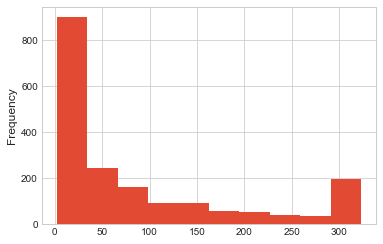

In [10]:
df['Score'].plot(kind='hist')

In [11]:
df[df['Gene_id']=='cgd4_3090-RA-p1']

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,Gene_id,desc
705,cgd4_3090-RA-p1,cgd4_3090-RA-p1,24,24,24,cgd4_3090-RA-p1 | transcript=cgd4_3090-RA | ge...,1,24,24,24,...,True;True;True;True;True;True;True;True;True;T...,1815;1894;1998;2006;2087;2680;2681;4040;5843;7...,19004;19005;19767;19768;19769;19770;19771;1977...,15745;15746;16468;16469;16470;16471;16472;1647...,15746;16475;17324;17353;18351;23295;23311;3415...,1738;1739;1740;1741;1742;1743;1744,141;286;340;341;360;458;486,24,cgd4_3090-RA-p1,Oocyst wall protein 6


## Extract Intensity Values
Let's have a look at the intensity values

In [12]:
#color palette
palette=['b','b','b','r','r','r']
palette_g = ['r','b']
color_dictionary = { 'b':'SPORO','r':'WALL'}

In [15]:
list(df.columns)

['Protein IDs',
 'Majority protein IDs',
 'Peptide counts (all)',
 'Peptide counts (razor+unique)',
 'Peptide counts (unique)',
 'Fasta headers',
 'Number of proteins',
 'Peptides',
 'Razor + unique peptides',
 'Unique peptides',
 'Peptides SPORO1',
 'Peptides SPORO2',
 'Peptides SPORO3',
 'Peptides WALL1',
 'Peptides WALL2',
 'Peptides WALL3',
 'Razor + unique peptides SPORO1',
 'Razor + unique peptides SPORO2',
 'Razor + unique peptides SPORO3',
 'Razor + unique peptides WALL1',
 'Razor + unique peptides WALL2',
 'Razor + unique peptides WALL3',
 'Unique peptides SPORO1',
 'Unique peptides SPORO2',
 'Unique peptides SPORO3',
 'Unique peptides WALL1',
 'Unique peptides WALL2',
 'Unique peptides WALL3',
 'Sequence coverage [%]',
 'Unique + razor sequence coverage [%]',
 'Unique sequence coverage [%]',
 'Mol. weight [kDa]',
 'Sequence length',
 'Sequence lengths',
 'Fraction average',
 'Fraction 1',
 'Fraction 2',
 'Fraction 3',
 'Fraction 4',
 'Fraction 5',
 'Fraction 11',
 'Fraction 1

In [18]:
##### tag ='Intensity'
tag ='iBAQ'
#tag ='LFQ intensity'
cols=[' SPORO1',' SPORO2',' SPORO3', ' WALL1', ' WALL2',' WALL3']
cols = [tag+n for n in cols]
selection = df[cols]
selection.columns = [n.split(' ')[-1] for n in cols]
print(selection.shape)
selection = selection[(selection.T != 0).any()]
print(selection.shape)

selection.describe()

(1876, 6)
(1874, 6)


,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3
count,1.874000e+03,1.874000e+03,1.874000e+03,1.874000e+03,1.874000e+03,1.874000e+03
mean,6.374380e+07,6.143658e+07,5.469018e+07,3.212904e+07,3.279931e+07,3.062875e+07
std,2.084184e+08,2.083652e+08,1.882692e+08,4.126732e+08,4.195079e+08,4.111695e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.003675e+06,7.935125e+05,7.229350e+05,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.265800e+06,4.385850e+06,3.871600e+06,5.204950e+04,5.270300e+04,6.156600e+04
75%,2.970875e+07,2.639750e+07,2.444650e+07,3.829925e+06,3.580475e+06,3.652100e+06
max,3.646900e+09,3.478600e+09,3.219200e+09,1.625000e+10,1.596300e+10,1.638500e+10


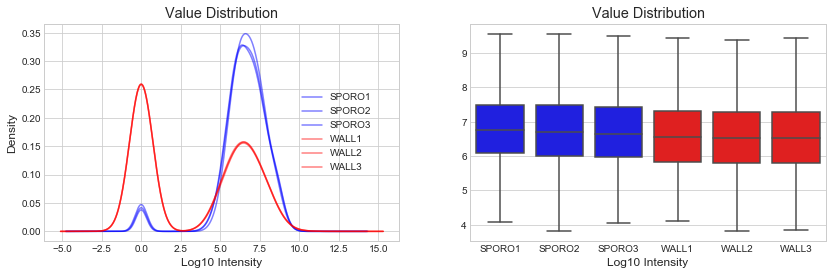

In [19]:
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(14,4))

np.log10(selection+1).plot(kind='kde', color=palette, alpha=0.5,ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')

sns.boxplot(data =np.log10(selection.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.savefig(os.path.join(TXT_PATH, 'value_distribution.png'))
plt.show()

### Notes
The intesity values of the first run are on average 2 log higher than the most recent run

## Missing Data Analysis
### firsth and second batch

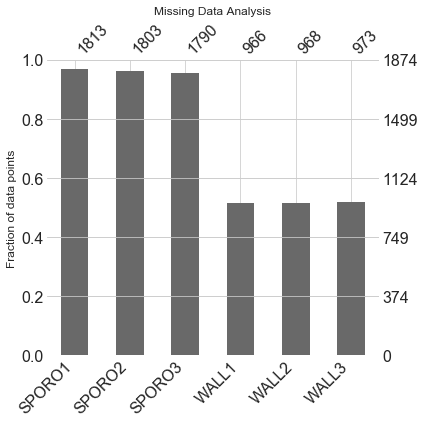

In [20]:
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan),figsize=(6, 6))
plt.title('Missing Data Analysis',size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.tight_layout()
plt.savefig('missing.png')
plt.show()

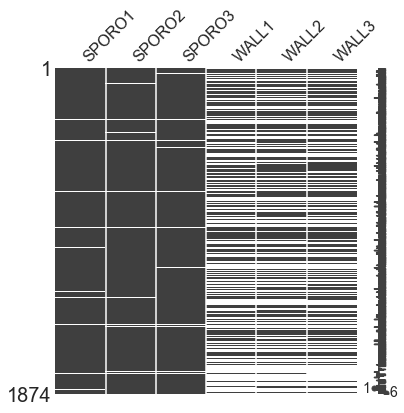

In [21]:
#print(data.shape)
msno.matrix(selection.replace(0,np.nan), figsize=(6, 6))
plt.show()

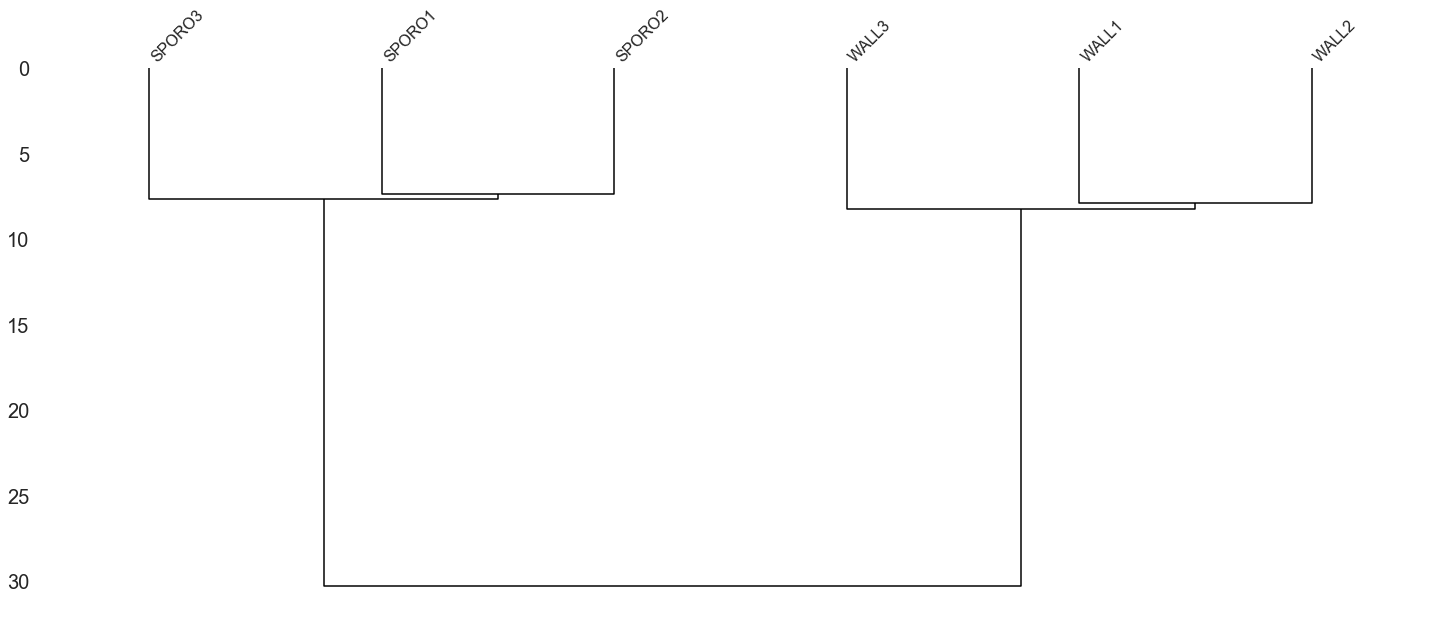

In [22]:
msno.dendrogram(selection.replace(0,np.nan))
plt.show()

In [64]:
#sporo_nan

In [24]:
sporo_nan = selection[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).isna().sum(axis=1)
wall_nan  = selection[['WALL1','WALL2','WALL3']].replace(0,np.nan).isna().sum(axis=1)
only_wall = selection[(sporo_nan==3) & (wall_nan<3)]
only_sporo = selection[(sporo_nan<3) & (wall_nan==3)]
print(' Found only in Wall:',only_wall.shape[0],'\n',
      'Found only in Sporo:',only_sporo.shape[0])

 Found only in Wall: 36 
 Found only in Sporo: 860


In [68]:
#df.head()

### Most aboundand found only in SPORO

In [27]:
cols=['LFQ intensity SPORO1', 'LFQ intensity SPORO2', 'LFQ intensity SPORO3',
      'LFQ intensity WALL1', 'LFQ intensity WALL2', 'LFQ intensity WALL3']

to_look = only_sporo.sort_values('SPORO1', ascending=False).index.values
temp = df.loc[to_look][['Protein IDs','desc']+cols]
temp['median_sporo'] = temp[['LFQ intensity SPORO1', 
                             'LFQ intensity SPORO2', 
                             'LFQ intensity SPORO3']].replace(0,np.nan).median(axis=1,skipna=True )
temp=temp.sort_values('median_sporo', ascending=False)
temp.to_csv(os.path.join(TXT_PATH, 'only_sporo.csv'))
temp.head()

,Protein IDs,desc,LFQ intensity SPORO1,LFQ intensity SPORO2,LFQ intensity SPORO3,LFQ intensity WALL1,LFQ intensity WALL2,LFQ intensity WALL3,median_sporo
1733,cgd8_4020-RA-p1,Uncharacterized protein,2738500000,2566500000,2041600000,0,0,0,2.566500e+09
2193,tr|F1ML89|F1ML89_BOVIN;tr|F1MVC0|F1MVC0_BOVIN,none,1384900000,1330900000,1395900000,0,0,0,1.384900e+09
2141,tr|A6H6Y4|A6H6Y4_BOVIN;tr|A0A3Q1NJ24|A0A3Q1NJ2...,none,1533100000,1222700000,1123400000,0,0,0,1.222700e+09
11,cgd1_1250-RA-p1,Uncharacterized Secreted Protein (CpLSP gene f...,705530000,816920000,820380000,0,0,0,8.169200e+08
913,cgd5_2963-RA-p1,U5snrp Brr2 SFII RNA helicase (sec63 and the s...,554940000,647560000,720020000,0,0,0,6.475600e+08


### Most aboundand found only in WALL

In [28]:
to_look = only_wall.sort_values('WALL1',ascending=False).index.values[0:20]
df.loc[to_look][['Protein IDs','desc']]

,Protein IDs,desc
982,cgd5_4530-RA-p1,Uncharacterized protein
1310,cgd7_1350-RA-p1,Uncharacterized protein
326,cgd2_3660-RA-p1,Subtilase family
1486,cgd7_4440-RA-p1,Glycosyltransferase 2-like
763,cgd4_4160-RA-p1,Uncharacterized protein
765,cgd4_4180-RA-p1,Uncharacterized protein
2123,tr|A0A452DIF5|A0A452DIF5_BOVIN;tr|G3MWV5|G3MWV...,none
469,cgd3_2130-RA-p1,Uncharacterized protein
950,cgd5_3810-RA-p1,Uncharacterized protein
1401,cgd7_2820-RA-p1;REV__cgd3_2780-RA-p1,Uncharacterized protein


## QC

### Chromatography
#### SPORO1
![title](static/SPORO1-BC-1.png)

#### WALL 1st submission
![title](static/BC_BC-1.png)

## Peptide x Protein group

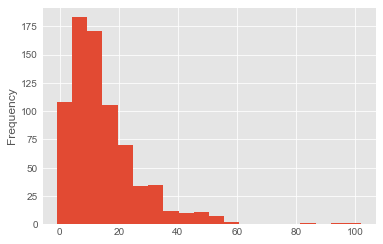

In [103]:
peptide_diff = df['Peptides WALL0']-df['Peptides WALL1']
peptide_diff.plot(kind='hist',bins=20)
plt.show()

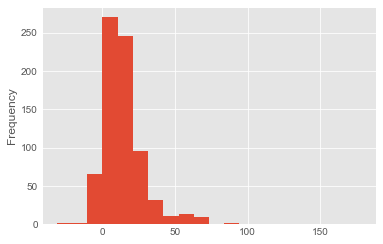

In [104]:
peptide_diff = df['Peptides WALL0']-df['Peptides SPORO1']
peptide_diff.plot(kind='hist',bins=20)
plt.show()

## Batch similarity

In [105]:
#selection.replace(0,np.nan).dropna().corr('spearman')

In [106]:
temp = np.log10(selection.replace(0,np.nan).dropna())
for n in temp.columns:
    ccc= PTUT.concordance_correlation_coefficient(temp['WALL0'].values, temp[n].values)
    print(n,ccc)
np.log10(selection.replace(0,np.nan).dropna()).corr(PTUT.concordance_correlation_coefficient)

SPORO1 0.17887706499467673
SPORO2 0.1911246520024323
SPORO3 0.216580772925176
WALL0 1.0000000000000002
WALL1 0.16917558680369685
WALL2 0.1608895480222026
WALL3 0.15103531299818895


,SPORO1,SPORO2,SPORO3,WALL0,WALL1,WALL2,WALL3
SPORO1,1.000000,0.973411,0.951016,0.178877,0.702015,0.653314,0.680258
SPORO2,0.973411,1.000000,0.968432,0.191125,0.708844,0.658463,0.678308
SPORO3,0.951016,0.968432,1.000000,0.216581,0.703417,0.642708,0.650197
WALL0,0.178877,0.191125,0.216581,1.000000,0.169176,0.160890,0.151035
WALL1,0.702015,0.708844,0.703417,0.169176,1.000000,0.960921,0.946270
WALL2,0.653314,0.658463,0.642708,0.160890,0.960921,1.000000,0.959376
WALL3,0.680258,0.678308,0.650197,0.151035,0.946270,0.959376,1.000000


### Switch to Lfq

In [43]:
#tag ='Intensity'
#tag ='iBAQ'
tag ='LFQ intensity'

cols=[' SPORO1',' SPORO2',' SPORO3', ' WALL0',' WALL1', ' WALL2',' WALL3', ' PULL']
cols = [tag+n for n in cols]
selection = df[cols]
selection.columns = [n.split(' ')[-1] for n in cols]
print(selection.shape)
selection = selection[(selection.T != 0).any()]
print(selection.shape)

selection.describe()

(1728, 8)
(1726, 8)


,SPORO1,SPORO2,SPORO3,WALL0,WALL1,WALL2,WALL3,PULL
count,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03
mean,4.174184e+09,4.212289e+09,4.378978e+09,2.155573e+09,1.589336e+09,1.548008e+09,1.457668e+09,4.396067e+09
std,8.199740e+10,8.507001e+10,8.645878e+10,1.515899e+10,7.722131e+09,7.960653e+09,7.693923e+09,8.789910e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.520275e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.375700e+07,1.126450e+08,0.000000e+00,0.000000e+00,0.000000e+00,4.366500e+07
75%,4.170225e+08,4.155750e+08,4.399525e+08,7.707025e+08,3.836125e+08,3.561250e+08,3.181100e+08,4.648150e+08
max,3.345200e+12,3.472800e+12,3.529700e+12,5.126700e+11,1.762200e+11,2.011300e+11,2.006700e+11,3.588100e+12


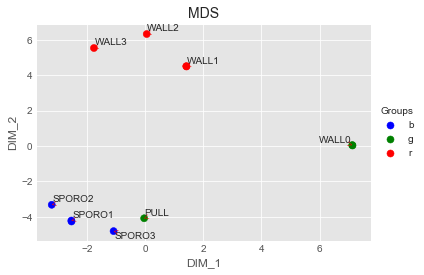

In [44]:
plt.style.use('ggplot')
fig,ax=plt.subplots()
PTUT.make_mds(np.log10(selection.replace(0,np.nan).dropna()),
              palette=palette,ax=ax,do_adjust_text=True)
plt.show()

In [45]:
#selection.head()

[0.88301857 0.08235873]


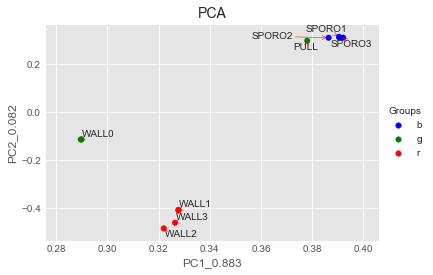

In [46]:
fig,ax=plt.subplots()
PTUT.make_pca(np.log10(selection.replace(0,np.nan).dropna()),
                       palette=palette,ax=ax,do_adjust_text=True)
plt.show()

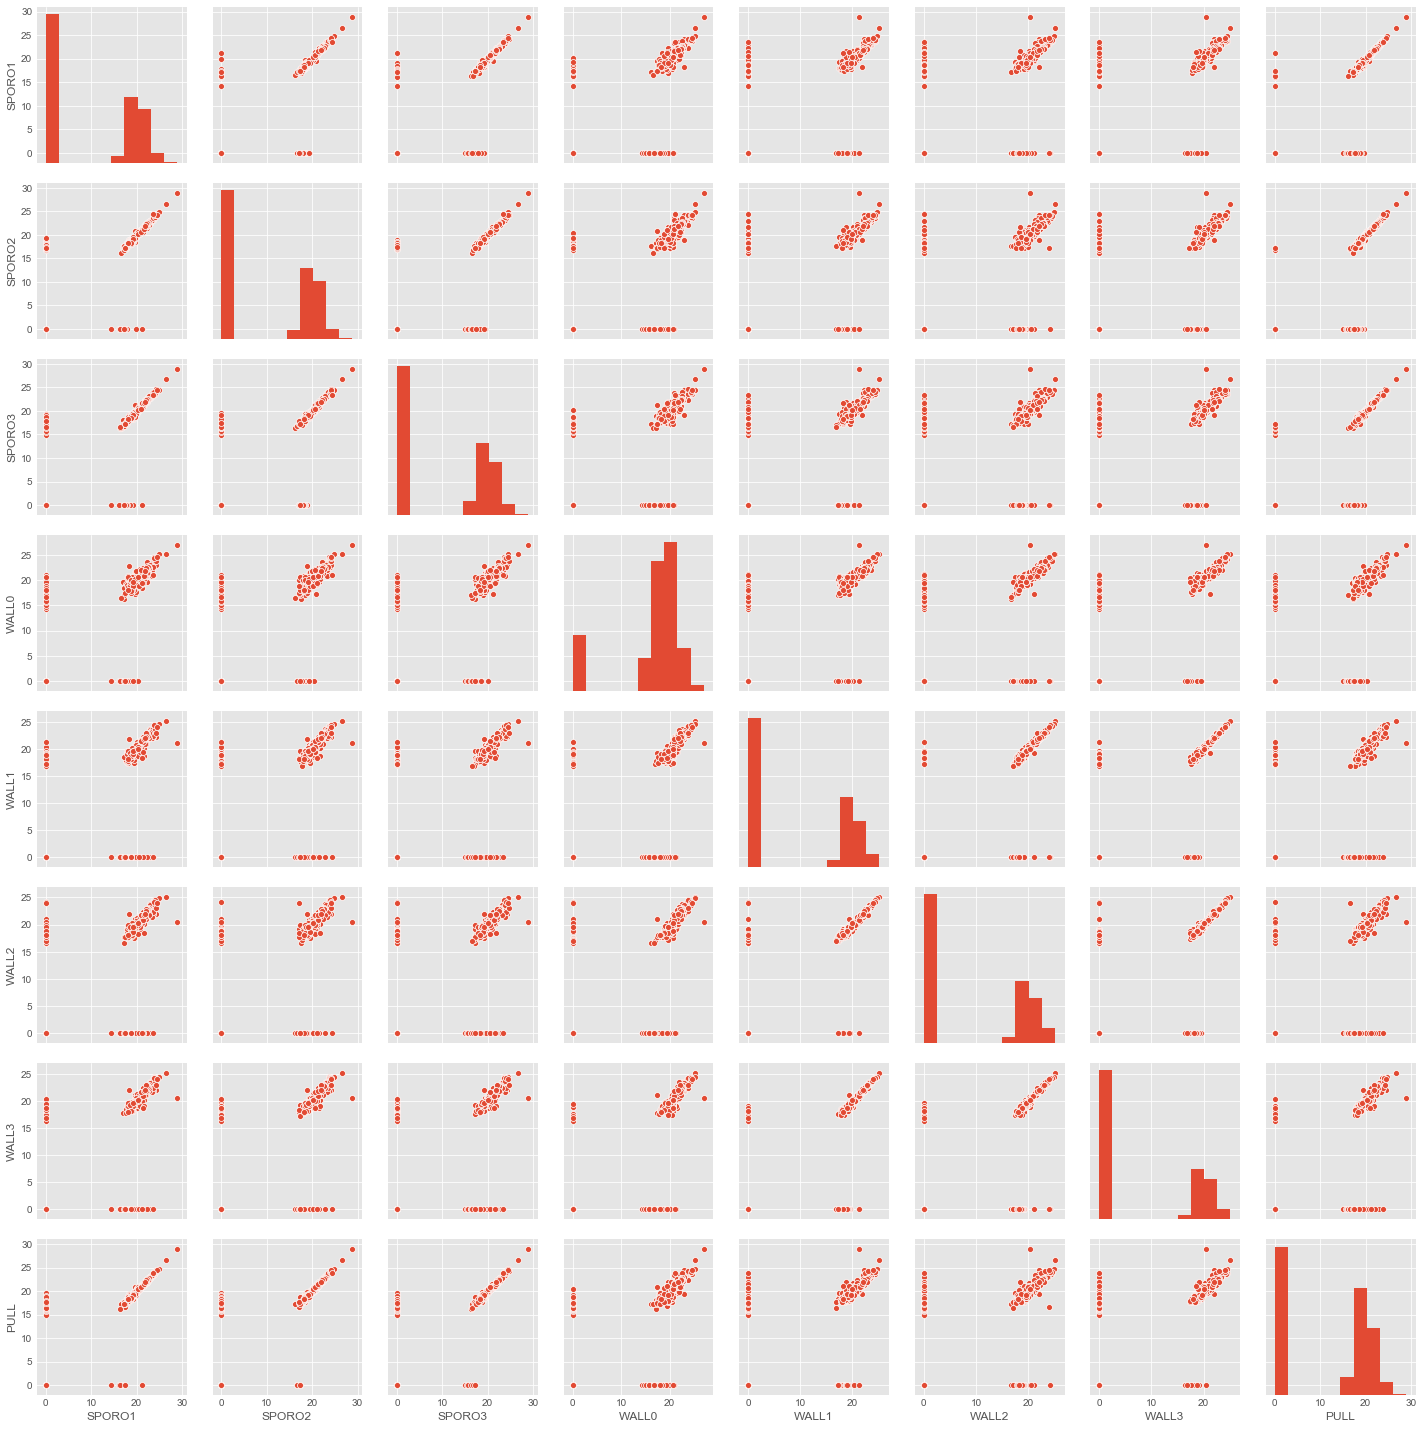

In [47]:
g = sns.pairplot(np.log1p(selection).dropna().sample(500))
plt.savefig(os.path.join(TXT_PATH,'corr_pairplot.png'))
plt.show()

### Coefficent of variation

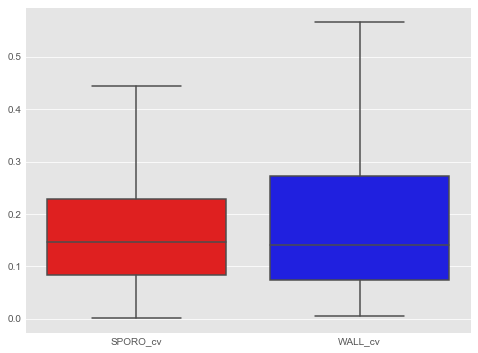

In [112]:
con_columns = ['SPORO1', 'SPORO2', 'SPORO3', ]
ind_columns= ['WALL1', 'WALL2', 'WALL3']

import seaborn as sns
cv = selection.copy()
cv = cv.dropna()
cv['mean_c'] = cv[con_columns].mean(axis=1)
cv['std_c'] = cv[con_columns].std(axis=1)

cv['mean_i'] = cv[ind_columns].mean(axis=1)
cv['std_i'] = cv[ind_columns].std(axis=1)

cv['SPORO_cv'] = cv['std_c']/cv['mean_c']
cv['WALL_cv'] = cv['std_i']/cv['mean_i']

fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=cv[['SPORO_cv','WALL_cv']],palette=palette_g,
            showfliers=False,ax=ax)
#plt.savefig(os.path.join('Fig_S3A_cv.png'))
plt.savefig(os.path.join(TXT_PATH,'cv.png'))
plt.show()

### Coefficent of variation and intensity

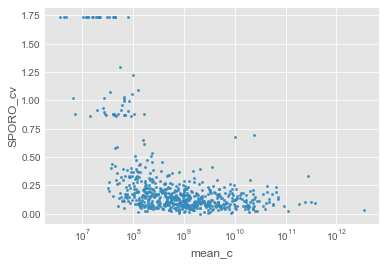

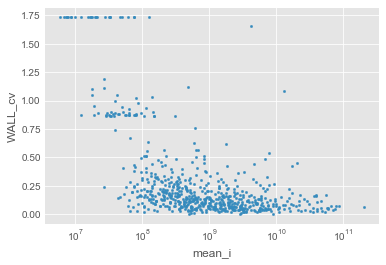

In [113]:
cv.plot(x='mean_c',y='SPORO_cv',kind='scatter',marker='.')
plt.xscale('log')
plt.show()
cv.plot(x='mean_i',y='WALL_cv',kind='scatter',marker='.')
plt.xscale('log')
plt.show()

## Find differential expressed proteins

In [28]:
#protein desc dictionary
desc_dict= dict(zip(df['Gene_id'],df['desc']))

### PolySTest
https://www.biorxiv.org/content/10.1101/765818v1

https://bitbucket.org/veitveit/polystest/src/master/

#### Create PolySTest input

In [29]:
polyt_in = np.log10(selection).replace(-np.inf,np.nan).replace(np.inf,np.nan)
polyt_in = polyt_in[['SPORO1', 'SPORO2', 'SPORO3',  'WALL1', 'WALL2', 'WALL3']]
polyt_in = polyt_in.dropna(how='all',axis=0)
print(polyt_in.shape)
polyt_in.head()
polyt_in = polyt_in.join(df[['Gene_id']],how='left')
polyt_in.set_index('Gene_id',inplace=True) 
polyt_in.head()
#polyt_in.to_csv(os.path.join(TXT_PATH, 'indata_PolySTest_oocyst.csv'))

(1156, 6)


,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3
Gene_id,,,,,,
cgd1_1060-RA-p1,NaN,7.789341,8.124178,8.379233,8.201479,8.304641
cgd1_1080-RA-p1,7.785757,7.927960,7.876922,8.357477,8.352992,8.299246
cgd1_1110-RA-p1,7.976272,7.821605,8.043951,7.671191,7.872209,7.510692
cgd1_1140-RA-p1,7.826120,7.895201,7.888646,NaN,7.896471,7.832464
cgd1_1160-RA-p1,NaN,7.212800,7.305416,NaN,NaN,NaN


#### Create PolySTest input with imputation

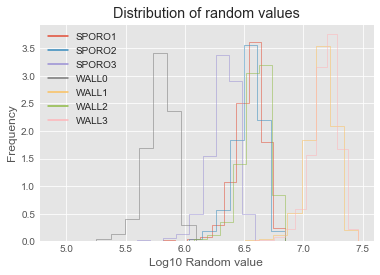

(1713, 6)


,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3
Gene_id,,,,,,
cgd1_1060-RA-p1,6.589976,7.789341,8.124178,8.379233,8.201479,8.304641
cgd1_1080-RA-p1,7.785757,7.927960,7.876922,8.357477,8.352992,8.299246
cgd1_110-RA-p1,6.723230,6.656053,6.422907,7.210018,6.793077,7.242767
cgd1_1110-RA-p1,7.976272,7.821605,8.043951,7.671191,7.872209,7.510692
cgd1_1140-RA-p1,7.826120,7.895201,7.888646,6.959770,7.896471,7.832464


In [30]:
polyt_in = selection.copy()
fig, ax = plt.subplots()
for n in polyt_in.columns:
    polyt_in[n] = PTUT.impute(polyt_in[n],ax=ax)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
PTUT.hist_legend(ax)
plt.title('Distribution of random values')
plt.xlabel('Log10 Random value')
plt.savefig(os.path.join(TXT_PATH,'random.png')) 
plt.show()

polyt_in = np.log10(polyt_in)
polyt_in = polyt_in[['SPORO1', 'SPORO2', 'SPORO3',  'WALL1', 'WALL2', 'WALL3']]
polyt_in = polyt_in.dropna(how='all',axis=0)
polyt_in = polyt_in.join(df[['Gene_id']],how='left')
polyt_in.set_index('Gene_id',inplace=True) 
print(polyt_in.shape)

polyt_in.to_csv(os.path.join(TXT_PATH, 'indata_PolySTest_oocyst2.csv'))
polyt_in.head()

#### Read PolySTest out

In [31]:
## Add some columns to the output for plotting
temp_PolySTest = pd.read_csv(os.path.join(TXT_PATH,'Results_oocyst_2020-01-28.csv'),
                   index_col=[0])

cols = ['SPORO1', 'SPORO2', 'SPORO3', 'WALL1','WALL2','WALL3']
#fig,ax=plt.subplots()
for n in cols:
    temp_PolySTest[n+'r']=temp_PolySTest[n].fillna(temp_PolySTest[n].mean())#util.impute(temp_PolySTest[n].fillna(0),ax=ax)

for n in temp_PolySTest.columns:
    if 'FDR ' in n:
        temp_PolySTest[n+'_log']=-np.log10(temp_PolySTest[n])
temp_PolySTest['log2fc']=np.log2((10**temp_PolySTest[['SPORO1r', 'SPORO2r', 'SPORO3r']]).mean(axis=1)/
                                 (10**temp_PolySTest[['WALL1r','WALL2r','WALL3r']]).mean(axis=1))

temp_PolySTest['log10meanInt']=temp_PolySTest[['SPORO1r', 'SPORO2r', 'SPORO3r']+
                                                  ['WALL1r','WALL2r','WALL3r']].mean(axis=1)


temp_PolySTest.head()

,log-ratios C2 vs C1,FDR PolySTest C2 vs C1,FDR limma C2 vs C1,FDR Miss test C2 vs C1,FDR rank products C2 vs C1,FDR permutation test C2 vs C1,FDR t-test C2 vs C1,Selected,SPORO1,WALL1,...,WALL2r,WALL3r,FDR PolySTest C2 vs C1_log,FDR limma C2 vs C1_log,FDR Miss test C2 vs C1_log,FDR rank products C2 vs C1_log,FDR permutation test C2 vs C1_log,FDR t-test C2 vs C1_log,log2fc,log10meanInt
cgd1_1060-RA-p1,0.338358,0.032712,0.008178,0.213269,0.302564,0.268524,0.096927,False,NaN,8.379233,...,8.201479,8.304641,1.485299,2.087359,0.671073,0.519183,0.571017,1.013555,0.249152,8.252288
cgd1_1080-RA-p1,0.473026,0.000374,0.000094,0.213269,0.025300,0.045825,0.005225,False,7.785757,8.357477,...,8.352992,8.299246,3.426645,4.028705,0.671073,1.596888,1.338896,2.281902,-1.560989,8.100059
cgd1_1110-RA-p1,-0.262579,0.050500,0.012625,0.870459,0.234419,0.268524,0.048207,False,7.976272,7.671191,...,7.872209,7.510692,1.296712,1.898772,0.060252,0.630008,0.571017,1.316891,0.820471,7.815987
cgd1_1140-RA-p1,-0.005521,0.877614,0.219403,1.000000,0.813926,0.963311,0.255181,False,7.826120,NaN,...,7.896471,7.832464,0.056697,0.658757,-0.000000,0.089415,0.016233,0.593152,-1.674333,8.015134
cgd1_1160-RA-p1,NaN,0.736672,NaN,0.736672,NaN,NaN,NaN,False,NaN,NaN,...,8.719163,8.809975,0.132726,NaN,0.132726,NaN,NaN,NaN,-1.643328,8.252352


#### Volcano Plot

no selection


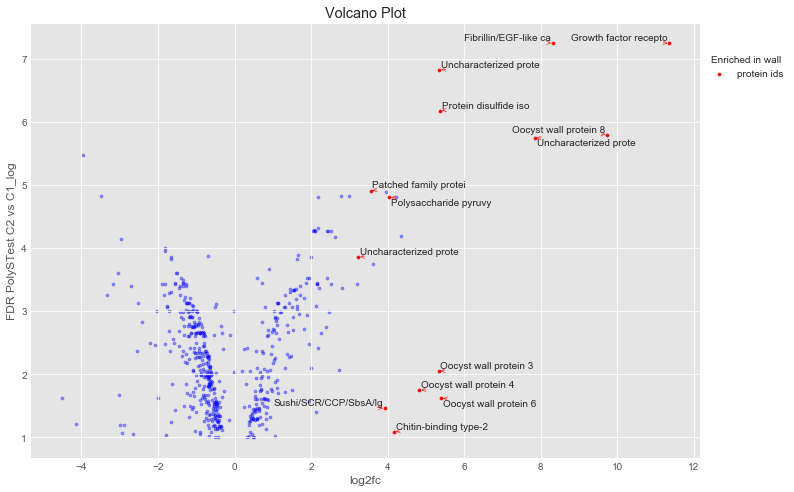

In [32]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']>3) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>1) &
                     (temp_PolySTest['log10meanInt']>9)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest[temp_PolySTest['FDR PolySTest C2 vs C1_log']>1], 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

no selection


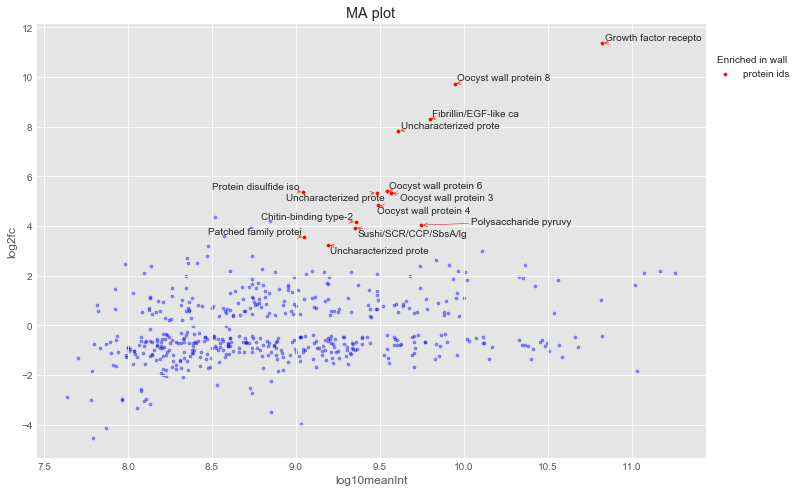

In [33]:
fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest[temp_PolySTest['FDR PolySTest C2 vs C1_log']>1], 
                  axes, 
                  x='log10meanInt', 
                  y='log2fc',
                   
             annot_index=_ids,
             annot_names = _names,
             title='MA plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

## Visualise Wall Markers

In [34]:
controls = ['cgd6_2090-RA-p1', 'cgd6_200-RA-p1', 'cgd4_3090-RA-p1']

In [35]:
#tag ='Intensity'
#tag ='iBAQ'
#tag ='LFQ intensity'
def plot_prot(gene,log=True,tag='LFQ intensity'):
    cols=[' SPORO1',' SPORO2',' SPORO3', ' WALL0',' WALL1', ' WALL2',' WALL3']
    cols = [tag+n for n in cols]
    temp = df[df['Fasta headers'].str.contains(gene)][cols]
    temp.columns = [n.split(' ')[-1] for  n in temp.columns]
    if log:
        temp=np.log10(temp)
    sns.barplot(data=temp,palette=palette)#.plot(kind='bar',color=palette)
    plt.title(gene)
    plt.show()
    print(desc_dict[gene])
    print(temp_PolySTest.loc[gene][['log2fc','log10meanInt']])


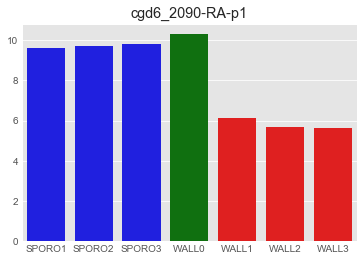

Growth factor receptor cysteine-rich domain containing protein
log2fc          11.3628
log10meanInt    10.8236
Name: cgd6_2090-RA-p1, dtype: object


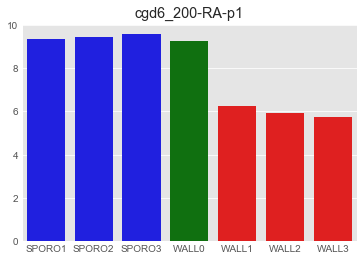

Oocyst wall protein 8
log2fc          9.74031
log10meanInt      9.945
Name: cgd6_200-RA-p1, dtype: object


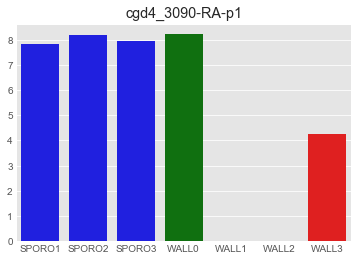

Oocyst wall protein 6
log2fc          5.39932
log10meanInt    9.54096
Name: cgd4_3090-RA-p1, dtype: object


In [36]:
for prot in controls:
    plot_prot(prot, log=True, tag='iBAQ')

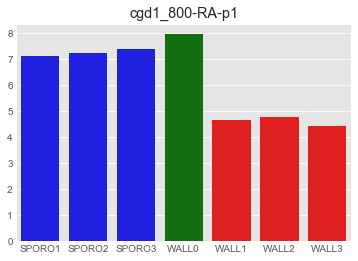

Protein disulfide isomerase
log2fc          5.36783
log10meanInt    9.04101
Name: cgd1_800-RA-p1, dtype: object


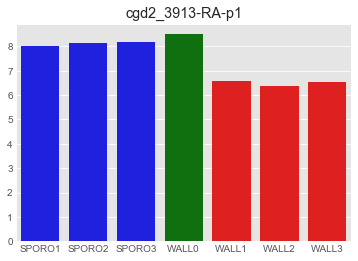

Uncharacterized protein
log2fc          3.23027
log10meanInt    9.18955
Name: cgd2_3913-RA-p1, dtype: object


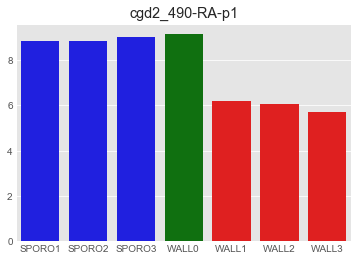

Uncharacterized protein
log2fc          7.84264
log10meanInt    9.60994
Name: cgd2_490-RA-p1, dtype: object


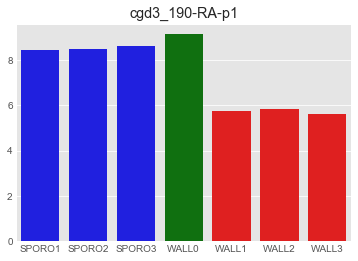

Fibrillin/EGF-like calcium-binding conserved site-containing protein
log2fc          8.31926
log10meanInt    9.79526
Name: cgd3_190-RA-p1, dtype: object


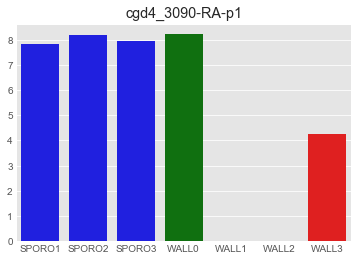

Oocyst wall protein 6
log2fc          5.39932
log10meanInt    9.54096
Name: cgd4_3090-RA-p1, dtype: object


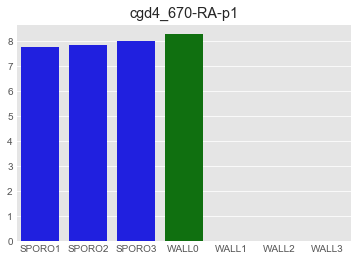

Oocyst wall protein 3
log2fc           5.3306
log10meanInt    9.56336
Name: cgd4_670-RA-p1, dtype: object


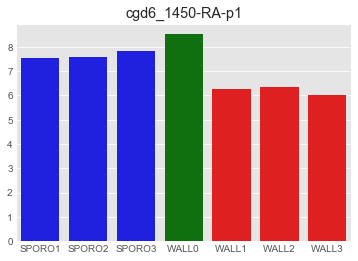

Polysaccharide pyruvyl transferase with Fringe-like domain
log2fc          4.03923
log10meanInt    9.74509
Name: cgd6_1450-RA-p1, dtype: object


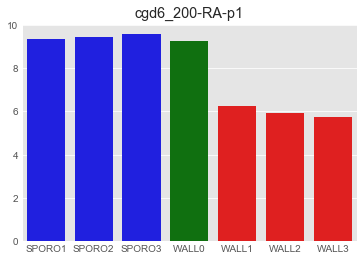

Oocyst wall protein 8
log2fc          9.74031
log10meanInt      9.945
Name: cgd6_200-RA-p1, dtype: object


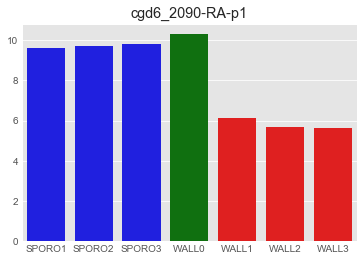

Growth factor receptor cysteine-rich domain containing protein
log2fc          11.3628
log10meanInt    10.8236
Name: cgd6_2090-RA-p1, dtype: object


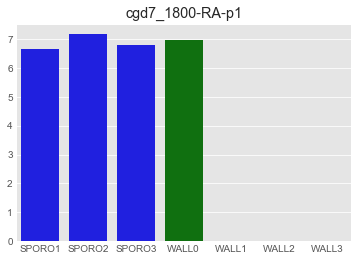

Chitin-binding type-2 domain containing protein
log2fc          4.16062
log10meanInt    9.35482
Name: cgd7_1800-RA-p1, dtype: object


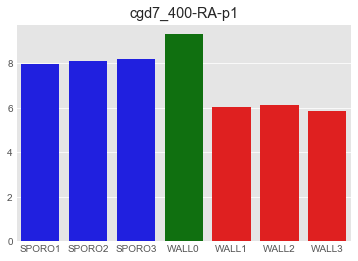

Uncharacterized protein
log2fc          5.35198
log10meanInt    9.47964
Name: cgd7_400-RA-p1, dtype: object


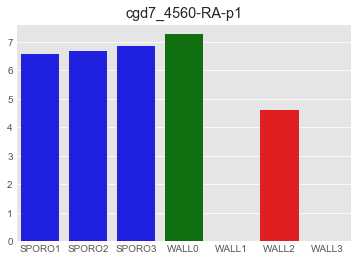

Sushi/SCR/CCP/SbsA/lg-like domain containing protein
log2fc          3.92816
log10meanInt    9.35238
Name: cgd7_4560-RA-p1, dtype: object


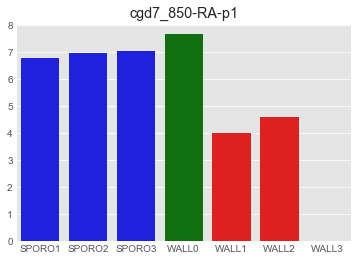

Patched family protein/Sterol-sensing domain-containing protein
log2fc          3.55244
log10meanInt    9.04853
Name: cgd7_850-RA-p1, dtype: object


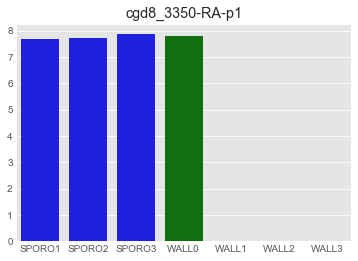

Oocyst wall protein 4
log2fc           4.8313
log10meanInt    9.48644
Name: cgd8_3350-RA-p1, dtype: object


In [37]:
for prot in _ids:
    plot_prot(prot, log=True, tag='iBAQ')

In [38]:
temp_PolySTest.head()
temp_PolySTest['desc']=[desc_dict[n] for n in temp_PolySTest.index.values]
temp_PolySTest.sort_values('FDR PolySTest C2 vs C1',inplace=True)
temp_PolySTest.to_csv(os.path.join(TXT_PATH,'def_PolySTest_out.csv'))

## ProtRank

In [114]:
indata_prank = selection[['SPORO1', 'SPORO2', 'SPORO3',  'WALL1', 'WALL2', 'WALL3']]
indata_prank.head()

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3
1,0,61566000,133100000,239460000,159030000,201670000
2,61060000,84715000,75322000,227760000,225420000,199180000
7,0,0,0,0,0,0
12,0,130680000,0,533660000,536100000,501430000
13,603180000,735970000,430570000,614520000,590230000,555940000


In [115]:
## replace prot

In [116]:
indata_prank = selection[['SPORO1', 'SPORO2', 'SPORO3',  'WALL1', 'WALL2', 'WALL3']]
#indata_prank=indata_prank.replace(0,np.nan)
#indata_prank=indata_prank.fillna(indata_prank.min())
indata_prank=indata_prank.join(df[['Gene_id']],how='left')
indata_prank.set_index('Gene_id',drop=True,inplace=True)
indata_prank.to_csv(os.path.join(TXT_PATH, 'indata_ProtRank.csv'))
indata_prank.head()

,SPORO1,SPORO2,SPORO3,WALL1,WALL2,WALL3
Gene_id,,,,,,
cgd1_1060-RA-p1,0,61566000,133100000,239460000,159030000,201670000
cgd1_1080-RA-p1,61060000,84715000,75322000,227760000,225420000,199180000
cgd1_1170-RA-p1,0,0,0,0,0,0
cgd1_1250-RA-p1,0,130680000,0,533660000,536100000,501430000
cgd1_1280-RA-p1,603180000,735970000,430570000,614520000,590230000,555940000


In [117]:
what_to_compare = [[['WALL1', 'SPORO1' ], ['WALL2', 'SPORO2' ], ['WALL3', 'SPORO3' ]]]
ProtRank.data_stats(indata_prank, what_to_compare = what_to_compare, ignore_missed = True)
description = 'SPORO_vs_WALL'
significant_proteins = ProtRank.rank_proteins(indata_prank, what_to_compare, description,
                                              path_to=TXT_PATH)


input data contain results for 751 proteins and 6 different conditions
list of measured conditions: SPORO1, SPORO2, SPORO3, WALL1, WALL2, WALL3
in the data, 16.6% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['WALL1', 'SPORO1'], ['WALL2', 'SPORO2'], ['WALL3', 'SPORO3']]]
after ignoring 48 rows with only zero counts, 703 rows remain
in the analyzed data, 11.0% of all counts are zeros
median count is 7.25e+08 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 5.72e+05
ratio between the 90th and the 10th percentile non-zero count is 1.06e+02
statistics of irregular missing values:
  in total, there are 346 comparisons involving a zero and a non-zero value (16.4% of all)
  out of 2109 comparisons, 55 involve a zero value and a non-zero exceeding 1.0 * median (2.6% of all)
  (the smaller the fraction, the smaller the problem with irregular zeros in th

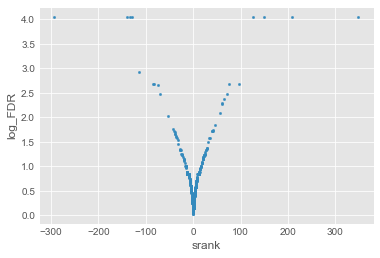

In [118]:
temp_1 = pd.read_csv(os.path.join(TXT_PATH,'prs-SPORO_vs_WALL.dat'),
                   sep='\t', comment='#', index_col=[1],
                   names=['id','rank','FDR','sign'])
temp_1['log_FDR']=-np.log10(temp_1['FDR']+0.00009)
temp_1['log_rank']=np.log10(temp_1['rank'])
temp_1['srank']=[n*1 if a=='+' else n*-1 for n,a in zip(temp_1['rank'],temp_1['sign'])]
temp_1['desc']=[desc_dict[n] for n in temp_1.index.values]
temp_1.plot(kind='scatter',x='srank',y='log_FDR',marker='.')
temp_1.to_csv(os.path.join(TXT_PATH,'prank_out.csv'))

no selection


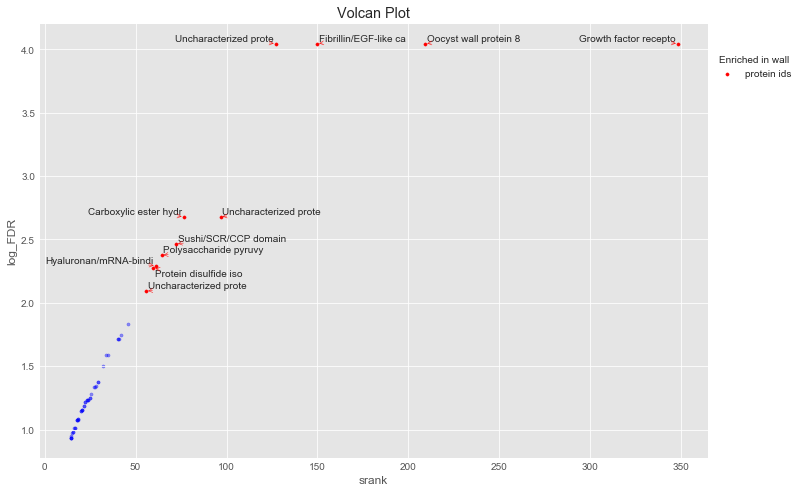

In [119]:
plt.style.use('ggplot')
temp = temp_1[(temp_1['srank']>14) & 
                                (temp_1['FDR']<0.01) 
                     ]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_1[temp_1['srank']>14],#[temp_PolySTest['log10meanInt']>9], 
                  axes, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcan Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

sporo_nan = indata_prank[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).isna().sum(axis=1)
wall_nan  = indata_prank[['WALL1','WALL2','WALL3']].replace(0,np.nan).isna().sum(axis=1)
only_wall = indata_prank[(sporo_nan==3) & (wall_nan<3)]
only_sporo = indata_prank[(sporo_nan<3) & (wall_nan==3)]
min_sporo = indata_prank[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).min()
min_wall = indata_prank[['WALL1','WALL2','WALL3']].replace(0,np.nan).min()
mask_wall = only_wall[['WALL1','WALL2','WALL3']].replace(0,np.nan).isna()
mask_sporo = only_sporo[['SPORO1','SPORO2','SPORO3']].replace(0,np.nan).isna()
mask_wall.columns = ['SPORO1','SPORO2','SPORO3']
mask_sporo.columns = ['WALL1','WALL2','WALL3']
only_wall[['SPORO1','SPORO2','SPORO3']] = only_wall[
    ['SPORO1','SPORO2','SPORO3']][mask_wall].fillna(min_sporo)
only_sporo[['WALL1','WALL2','WALL3']] = only_sporo[
    ['WALL1','WALL2','WALL3']][mask_sporo].fillna(min_wall)
filled_df = pd.concat([only_wall,only_sporo])
filled_df.head()
indata_prank.loc[filled_df.index.values,:]=filled_df

## PolySTest with imputation

In [45]:
RAW_FILE_PATH =os.path.join('D:', os.sep, 'beatrice','raw','merge')
TXT_PATH=os.path.join(RAW_FILE_PATH, PREFIX, 'combined', 'txt')
## Add some columns to the output for plotting
temp_PolySTest = pd.read_csv(os.path.join(TXT_PATH,'Results_oocyst_2_2020-01-29.csv'),
                   index_col=[0])

cols = ['SPORO1', 'SPORO2', 'SPORO3', 'WALL1','WALL2','WALL3']
#fig,ax=plt.subplots()
for n in cols:
    temp_PolySTest[n+'r']=temp_PolySTest[n].fillna(temp_PolySTest[n].mean())#util.impute(temp_PolySTest[n].fillna(0),ax=ax)

for n in temp_PolySTest.columns:
    if 'FDR ' in n:
        temp_PolySTest[n+'_log']=-np.log10(temp_PolySTest[n])
temp_PolySTest['log2fc']=np.log2((10**temp_PolySTest[['SPORO1r', 'SPORO2r', 'SPORO3r']]).mean(axis=1)/
                                 (10**temp_PolySTest[['WALL1r','WALL2r','WALL3r']]).mean(axis=1))

temp_PolySTest['log10meanInt']=temp_PolySTest[['SPORO1r', 'SPORO2r', 'SPORO3r']+
                                                  ['WALL1r','WALL2r','WALL3r']].mean(axis=1)



temp_PolySTest['desc']=[desc_dict[n] for n in temp_PolySTest.index.values]
temp_PolySTest.sort_values('FDR PolySTest C2 vs C1',inplace=True)
temp_PolySTest.to_csv(os.path.join(TXT_PATH,'def_PolySTest_out2.csv'))
temp_PolySTest.head()

,log-ratios C2 vs C1,FDR PolySTest C2 vs C1,FDR limma C2 vs C1,FDR Miss test C2 vs C1,FDR rank products C2 vs C1,FDR permutation test C2 vs C1,FDR t-test C2 vs C1,Selected,SPORO1,WALL1,...,WALL3r,FDR PolySTest C2 vs C1_log,FDR limma C2 vs C1_log,FDR Miss test C2 vs C1_log,FDR rank products C2 vs C1_log,FDR permutation test C2 vs C1_log,FDR t-test C2 vs C1_log,log2fc,log10meanInt,desc
cgd7_4990-RA-p1,2.468778,0.000037,0.000047,0.126639,0.000009,0.037202,0.005301,False,6.688454,8.994084,...,9.009706,4.426890,4.326802,0.897432,5.028950,1.429435,2.275634,-8.091525,7.784708,Ubiquitin ligase with a HECT domain at the C-t...
cgd4_670-RA-p1,-3.533525,0.000037,0.000047,0.005192,0.000009,0.042254,0.005597,False,10.354397,6.963618,...,7.066658,4.426890,4.326802,2.284686,5.028950,1.374132,2.252043,11.518102,8.599606,Oocyst wall protein 3
cgd6_2090-RA-p1,-3.437703,0.000040,0.000013,0.001487,0.000020,0.037749,0.002733,False,12.528878,9.272352,...,9.042930,4.398912,4.893855,2.827732,4.699942,1.423094,2.563405,11.362771,10.823621,Growth factor receptor cysteine-rich domain co...
cgd3_190-RA-p1,-2.508728,0.000051,0.000013,0.001487,0.000533,0.037749,0.001731,False,11.055646,8.548439,...,8.460823,4.291795,4.893855,2.827732,3.272905,1.423094,2.761823,8.319263,9.795261,Fibrillin/EGF-like calcium-binding conserved s...
cgd4_3090-RA-p1,-3.410420,0.000062,0.000131,0.017350,0.000015,0.037202,0.003135,False,10.222612,7.166875,...,7.159048,4.209166,3.882265,1.760702,4.811226,1.429435,2.503711,11.174651,8.616355,Oocyst wall protein 6


### Where are histones?

no selection


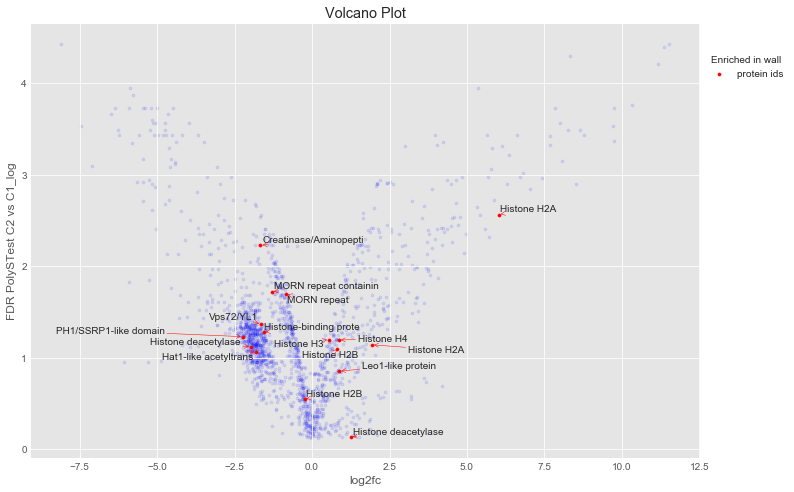

In [46]:
temp=pd.read_csv('static\\CriptoDB\\histone.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_PolySTest.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]




fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest, 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Where are Walls ?

no selection


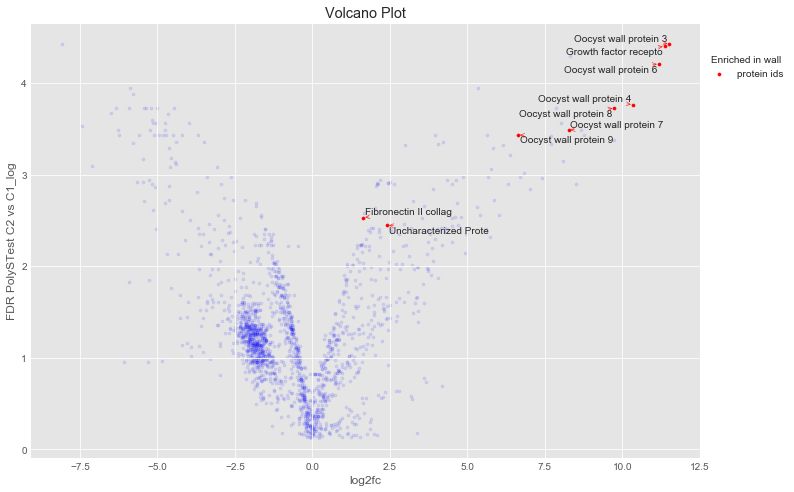

In [47]:
temp=pd.read_csv('static\\CriptoDB\\wall.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_PolySTest.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]




fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest, 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Where are Nucleolar?

no selection


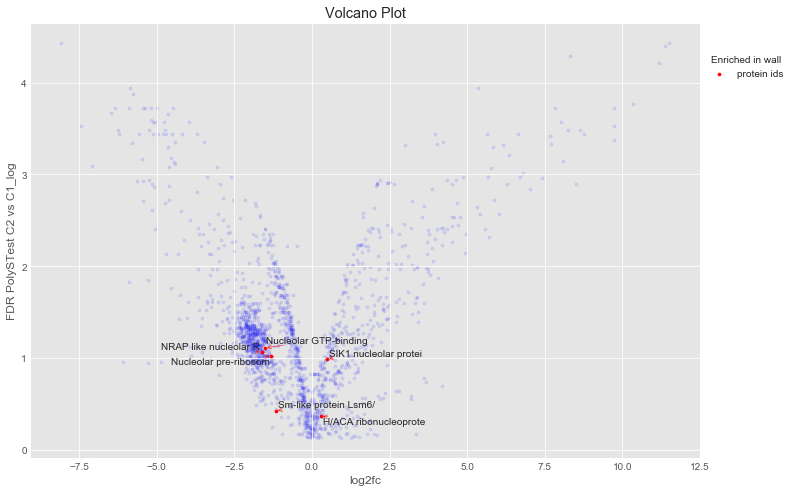

In [48]:
temp=pd.read_csv('static\\CriptoDB\\nucleolar.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_PolySTest.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest, 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Where are nuclear pore proteins?

no selection


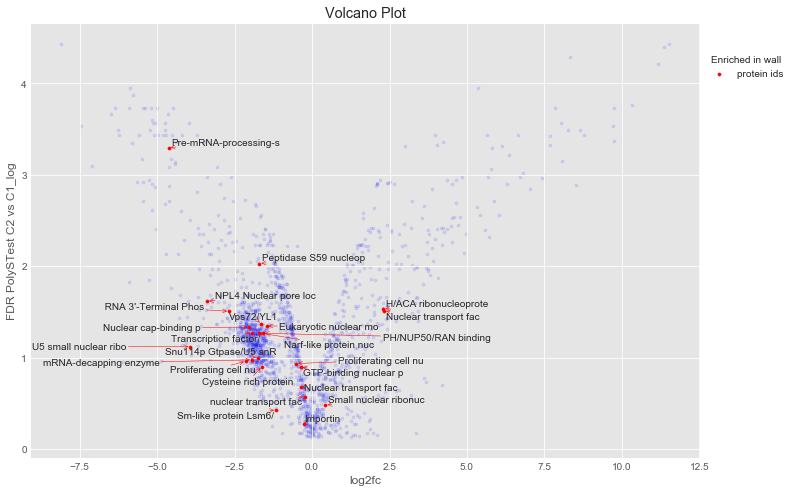

In [49]:
temp=pd.read_csv('static\\CriptoDB\\nuclear_pore.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_PolySTest.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest, 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

no selection


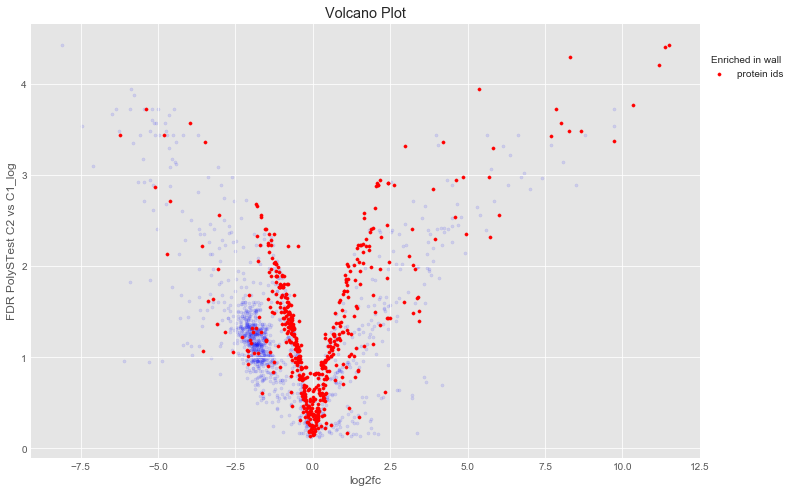

In [51]:
temp=pd.read_csv('static\\CriptoDB\\wall_proteomics.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_PolySTest.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest, 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=False,
                  do_adjust_text=False,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

no selection


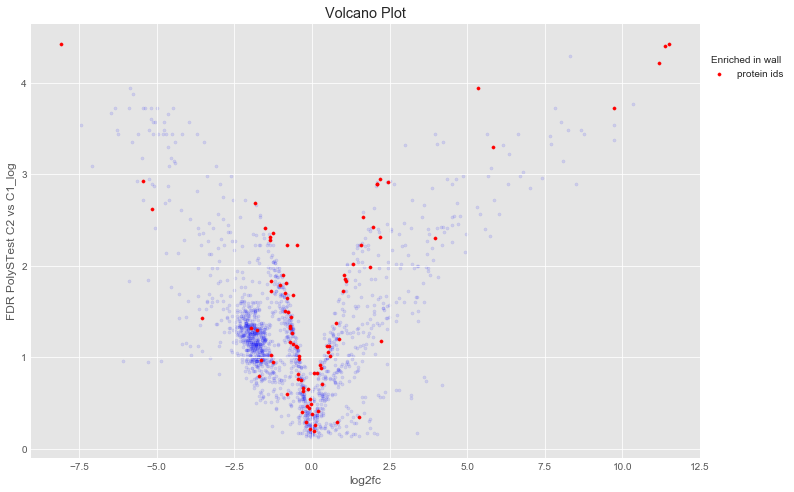

In [53]:
temp=pd.read_csv('static\\CriptoDB\\Mitochondrial_proteome.txt',sep='\t',index_col=[0])
temp['_ids']=[n+'-RA-p1' for n in  temp.index.values]
temp=temp[temp['_ids'].isin(temp_PolySTest.index.values)]

_ids = temp['_ids'].values
_names = temp['Product Description'].values
_names = [' '.join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest, 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=False,
                  do_adjust_text=False,
                      alpha_main=0.1,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Enriched

no selection


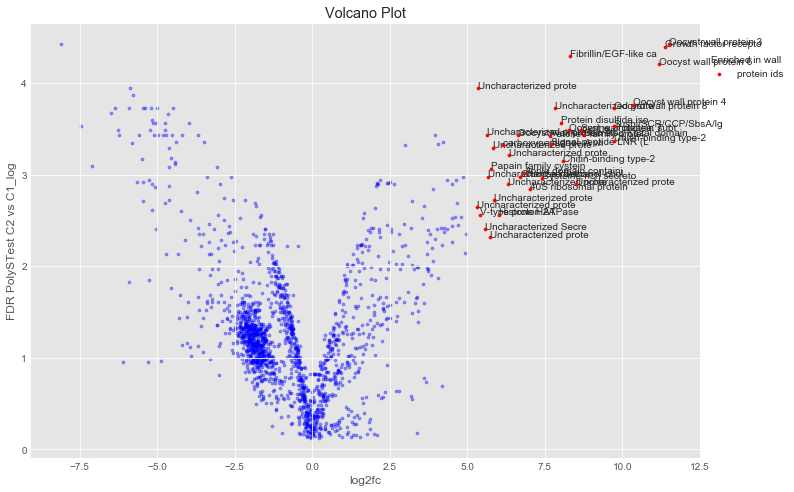

In [50]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']>5) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>2)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest, 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=False,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

### Zoom on enriched

no selection


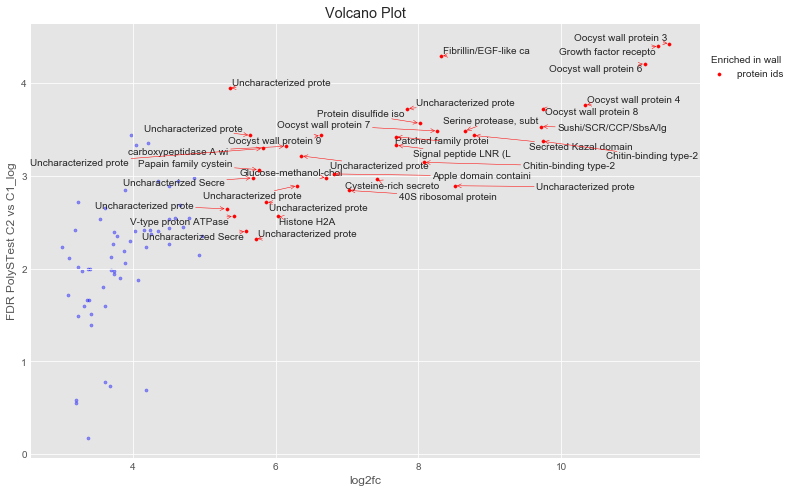

In [51]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']>5) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>2)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest[temp_PolySTest['log2fc']>3], 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

no selection


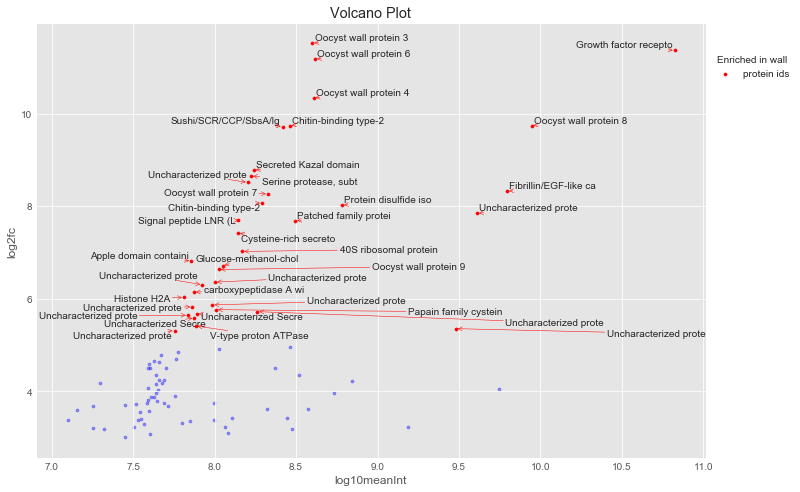

In [71]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']>5) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>2)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest[temp_PolySTest['log2fc']>3], 
                  axes, x='log10meanInt', y='log2fc', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

no selection


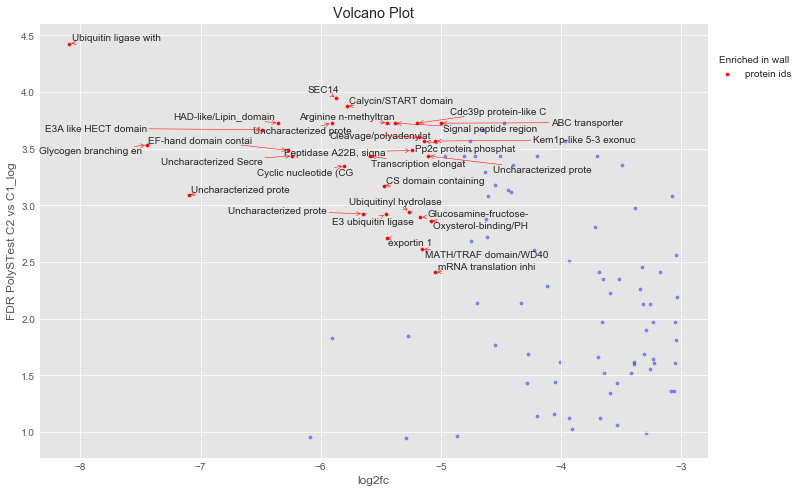

In [55]:
temp = temp_PolySTest[(temp_PolySTest['log2fc']<-5) & 
                                (temp_PolySTest['FDR PolySTest C2 vs C1_log']>2)]


_ids = temp.index.values
_names = [desc_dict[n] for n in _ids]#temp['desc']
_names = [' ' .join(n.split(' ')[0:4])[0:21] for n in _names]

fig,axes=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
PTUT.make_vulcano(temp_PolySTest[temp_PolySTest['log2fc']<-3], 
                  axes, x='log2fc', y='FDR PolySTest C2 vs C1_log', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano Plot',
             label_for_selection='protein ids',
                      add_text=True,
                  do_adjust_text=True,
                      alpha_main=0.4,
                      point_size_selection=10,
                  point_size_all=10)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.9), title='Enriched in wall')    
plt.show()

In [82]:
!jupyter nbconvert --to html_toc analysis.ipynb

[NbConvertApp] Converting notebook analysis.ipynb to html_toc
[NbConvertApp] Support files will be in analysis_files\
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory analysis_files
[NbConvertApp] Making directory anal

In [73]:
indf = pd.read_csv(os.path.join(RAW_FILE_PATH,'BC_BC-1.tsv'),sep='\t')

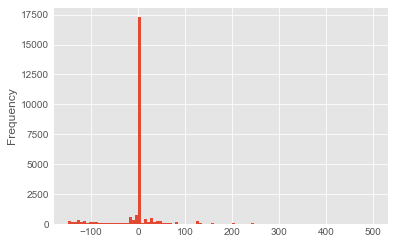

In [80]:
indf.massdiff.plot(kind='hist',bins=100)